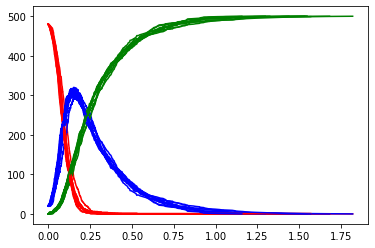

In [1]:
from matplotlib import pyplot
from montecarlo import SSA, SSAModel


# initial species counts and sojourn times
initital_conditions = {
    "s": [480],
    "i": [20],
    "r": [0],
    "time": [0.0],
}


# propensity functions
propensities = {
    0: lambda d: 25.0 * d["s"][-1] * d["i"][-1] / 300,
    1: lambda d: 5.0 * d["i"][-1],
}


# change in species for each propensity
stoichiometry = {
    0: {"s": -1, "i": 1, "r": 0},
    1: {"s": 0, "i": -1, "r": 1},
}


# instantiate the epidemic SSA model
epidemic = SSAModel(
    initital_conditions,
    propensities,
    stoichiometry
)


# instantiate the SSA container with model
epidemic_generator = SSA(epidemic)


trajectories = 0
for trajectory in epidemic_generator.direct():
    if trajectory["s"][-1] <= 10:
        pyplot.plot(
            trajectory["time"], trajectory["s"], color="red"
        )
        pyplot.plot(
            trajectory["time"], trajectory["i"], color="blue"
        )
        pyplot.plot(
            trajectory["time"], trajectory["r"], color="green"
        )
        trajectories += 1
    else:
        continue
    if trajectories == 10:
        break
pyplot.show()